<div align="center">
  <img src="https://github.com/Alek050/databallpy/assets/49450063/56100e87-c680-4dc1-82e5-4aa8fdbc8a34" alt="Logo">
</div>

# Loading in a Game

Almost all usable features are centered around the `Game` object. The `Game` essentially contains all information you need to know to get started with your analysis. We will go over all information that is stored here and you might want to use, but lets first load in the game. You can choose to load in a game with your own data, or choose to download a open sourced game. To the game with you own data you can run the following code:

```python
from databallpy import get_game, get_open_game

game = get_game(
  tracking_data_loc="../data/tracking_data.dat",
  tracking_metadata_loc="../data/tracking_metadata.xml",
  tracking_data_provider="tracab"
  event_data_loc="../data/event_data_f24.xml",
  event_metadata_loc="../data/event_metadata_f7.xml",
  event_data_provider="opta",
)

# or get the open game provided by Metrica
game = get_open_game(provider="metrica")
```

## Currently supported providers
The current supported tracking data providers are:
- Tracab (including Sportec Solutions from the DFL)
- Metrica
- Inmotio
The accepted variables for the `tracking_data_provider` are `["tracab", "metrica", "inmotio", "dfl", "sportec"]`

The current supported event data provider are:
- Opta
- Metrica
- Instat
- SciSports
- Sportec Solutions (from the DFL)
- Statsbomb
The accepted variables for the `event_data_provider` are `["opta", "metrica", "instat", "scisports", "dfl", "sportec", "statsbomb"]`

If you wish to use a different provider that is not listed here, please open an issue [here](https://github.com/Alek050/databallpy/issues)

### Statsbomb data
For all providers you can specify the main data (event or tracking data file location) and the metadata file location. However, for Statsbomb, the metadata is split up in the `game` and `lineup` information. To load in event data of Statsbomb, please use the following code for the event data part (360 freeze frame data is not supported yet!)

```python
game = get_game(
    event_data_loc="../data/events.json",
    event_game_loc="../data/game.json",
    event_lineup_loc="../data/lineup.json",
    event_data_provider="statsbomb",
)

```

```{warning}
It is perfectly fine to load your `Game` object with only tracking- or only event data. However, not that some features require both data streams, and will therefore raise an error when called.

```

For the sake of reproducability we will use the open game provided by Metrica in this example:

````{margin}
```{note}
See the [Open Sourced Data](https://databallpy.readthedocs.io/en/latest/getting_started/loading_in_a_game_page.html#open-sourced-data) header below for all included open data sets.
```
````

In [6]:
from databallpy import get_open_game, __version__

print(f"The current version of databallpy is {__version__}")

The current version of databallpy is 0.5.3


```python
game = get_open_game(provider="metrica", verbose=False)
```

In [7]:
from databallpy import get_saved_game
import os
game = get_open_game(provider="metrica", verbose=False)
game.save_game("open_metrica", os.path.join(os.getcwd(), "..", "saved_games"))
game = get_saved_game("open_metrica", os.path.join(os.getcwd(), "..", "saved_games"))

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /metrica-sports/sample-data%20%20%20%20%20%20%20%20/master/data/Sample_Game_3/Sample_Game_3_tracking.txt (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x123b71390>: Failed to resolve 'raw.githubusercontent.com' ([Errno 8] nodename nor servname provided, or not known)"))

Simple as that! Note that it might take a few seconds to load in your data. On top of that, it might be different for different data providers. Currently, the package is mostly optimized for loading tracab and opta data. For the other providers, without a doubt, improvements in performance can be made. All suggestions are welcome.

## Game Attributes 

### Metadata

Before looking at the tracking and event data, lets first investigate the metadata of the game that is available. Firstly the game specific metadata:
- The end score
- The date
- The pitch dimensions
- The periods DataFrame

In [3]:
print(f"Game name: {game.name}\n")
print(f"Game home team score: {game.home_score} and the game away team score {game.away_score}\n")
print(f"The pitch length: {game.pitch_dimensions[0]} (m), and pitch width: {game.pitch_dimensions[1]} (m)\n")
print(f"Info about the first half periods: \n", game.periods.iloc[0])

Game name: Team A 0 - 2 Team B 2019-02-21 03:30:07

Game home team score: 0 and the game away team score 2

The pitch length: 105.0 (m), and pitch width: 68.0 (m)

Info about the first half periods: 
 period_id                                           1
start_frame                                         1
end_frame                                       69661
start_datetime_td           2019-02-21 03:30:07+00:00
end_datetime_td      2019-02-21 04:16:33.400000+00:00
start_datetime_ed           2019-02-21 03:30:07+00:00
end_datetime_ed      2019-02-21 04:16:33.400000+00:00
Name: 0, dtype: object


Most of these are rather simple, but important to be able to access easily. The `periods` might require a little extra information. For every `period_id`, it hold information about both the tracking and the event data. `td` is short for "tracking_data" and `ed` for `event_data`. So in this game, the last frame of the first half (since `period_id` is 1), is 69661. Since both tracking and event data are provided by Metrica, the datetimes are already perfectly aligned. This is often not te case when using different tracking and event data providers. In this case, the start and end datetime thus refer to the start and end datetime of the first half.

```{note}
`period_id`"
- 1 = the first half
- 2 = the second half
- 3 = the first half of additional time
- 4 = the second half of the additional time
- 5 = the penalty shootout
```

### Team and Player Information

Some aditional team information stored in the `Game`. On top of that, information about the players is crucial for individual player and group analysis.

- team id
- team name
- team formation
- team players

In [4]:
print(f"The home team id = {game.home_team_id}\n")
print(f"The away team name = {game.away_team_id}\n")
print(f"The home team formation = {game.home_formation}\n")
print("The first away team player is:\n", game.away_players.iloc[0])

The home team id = FIFATMA

The away team name = FIFATMB

The home team formation = 1451

The first away team player is:
 id                       3595
full_name           Player 28
formation_place             0
position           goalkeeper
starter                  True
shirt_num                  28
start_frame              -999
end_frame                -999
Name: 0, dtype: object


The team names are anonimized by Metrica to open source the data. You can also see that the home team appears to have started at a 4-5-1 formation. Lastly, for every player, some important information is stored in the `game.away_players` dataframe. For instance, here you can find the player id, position, shirt number, etc. 

```{important}
The start and end frame normally represent the frames where the players started the game, and when they ended the game. However, for Metrica we did not implement this yet. Therefore the value is -999. This is the default value for a missing integer value in DataBallPy. This is chosen since making it `NaN` would change to full column to a `float64` object, while it should stay of type integer.
```

## Tracking Data

Tracking data captures the locations of all players and the ball, normally between 10 and 25 frames per second. This means that a pandas dataframe filled with these values have up to 200.000 rows. It is not really usefull to show how this dataframe looks like, but I will go over some other important additional information, and show all the preprocessing that has been done before getting to this cleaned format.

- the tracking data
- frame rate
- tracking data provider

In [5]:
print(f"The tracking data provider = {game.tracking_data.provider}\n")
print(f"The tracking data frames per second = {game.frame_rate}\n")
print(f"The tracking data dataframe:\n", game.tracking_data[["frame", "ball_x", "ball_status", "home_11_x", "away_32_y", "period_id", "gametime_td"]].iloc[360:365])

AttributeError: 'DataFrame' object has no attribute 'provider'

As you can see, the tracking data of a game is simply a pandas dataframe, making it easy to perform manipulation or filtering on the data. The tracking data has a few distinct columns:

- Frame information: Depending on the provider, the frame number will start at 1 or at a timestamp for that day. In this case, it starts at one and counts up as time proceeds with 25 fps.

- Ball information: `ball_x`, `ball_y`, and `ball_z` give information about the position of the ball on the pitch. Be cautious with `ball_z` since it often is poor quality data. `ball_status` is either `dead` or `alive`, indication whether the game is playing or not. `team_possession` indicates what team has possession of the ball. The values can either be `home`, `away`, or `None`. For Metrica data it is put to `None` since the data does not indicate which team has possession. Later, you will see how you can use the event data to guess the team that is in ball possession.

- Player information: For every player the x (length) and y (width) coordinate are presented. The column name is based on the team the side the player plays for (either `home` or `away`), the jersey number of that player, and the type of data that is presented (x coordinate or y coordinate). The column name for the x-coordinate of the player that plays for the home team with jersey 12 is thus `home_12_x`.

- General game information: The `period_id` indicates what period of the game is played. A period id of `1` refers to the first half of the game, while `2` refers to the second half. The `gametime_td` column gives the time in minutes:seconds of the game to give an indication of how far the game is along. It also tracks extra time, see the example below:

In [ ]:
print(game.tracking_data[["frame", "ball_x", "ball_status", "home_11_x", "away_32_y", "period_id", "gametime_td"]].tail())

         frame  ball_x ball_status  home_11_x  away_32_y  period_id gametime_td
143756  143757     NaN        dead  -39.90735    8.39732          2  90:00+4:23
143757  143758     NaN        dead  -39.90735    8.43404          2  90:00+4:23
143758  143759     NaN        dead  -39.90735    8.48572          2  90:00+4:23
143759  143760     NaN        dead  -39.90735    8.57548          2  90:00+4:23
143760  143761     NaN        dead  -39.90735    8.94676          2  90:00+4:23


```{note}
In the tracking data we make use of what we call a `column_id`. This represents a team and a jersey number (e.g. "home_12" or "away_4"). To get easy access to a specific set of players, make use of `game.get_column_ids()` method, in which you can specify the team, position and minimal minutes played and get back a list of column ids that pass the filters. For more information see our [api reference](https://databallpy.readthedocs.io/en/latest/api_docs/game_api.html#game-object).
```

### Pitch Conventions

One additional important point is to talk about the pitch conventions. Event and tracking data do often not align. In most cases, event data providers (like Opta) have the positions scaled between 0 and 1. On top of that, they represent the player to which the event belongs as defending the goal at x = 0.0 and wanting to score at the goal at x = 1.0. This means that with every posession change, the playing direction of a team changes. Controversly, the tracking data providers (like tracab) often represent the situation as it is seen on tv, where teams switch half way. We choose to normalize the playing direction as follows:

- The pitch center is coordinate (0, 0).
- The coordinate values are in meters.
- The home team is represented as playing from left to right **for the full game**.
- The away team is represented as playing from right to left **for the full game**.

See the example below:

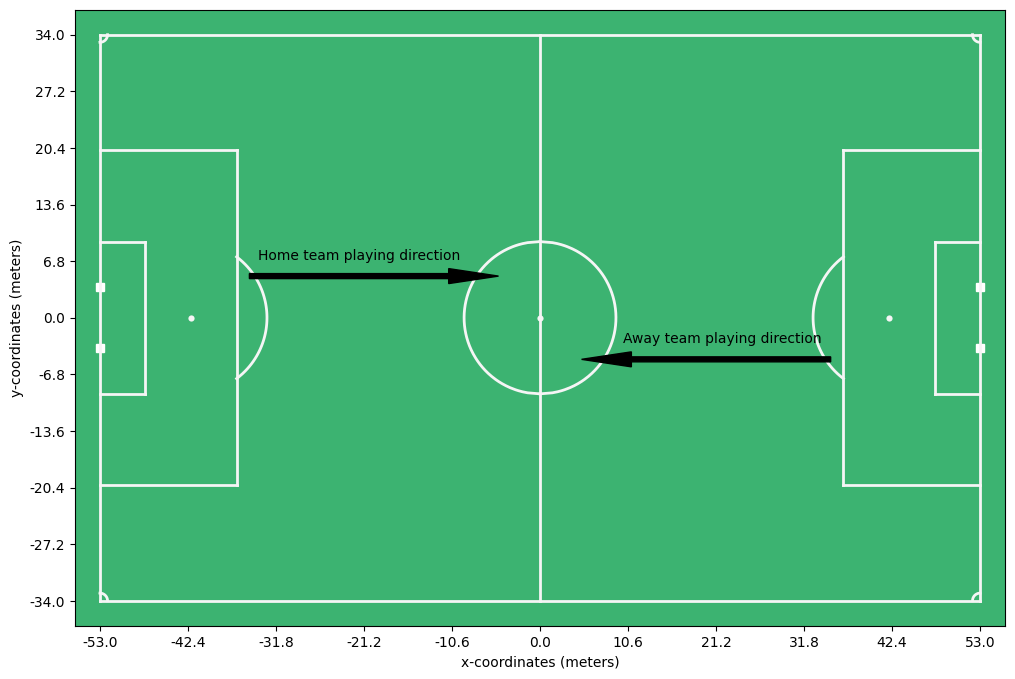

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from matplotlib.patches import Arrow
from databallpy.visualize import plot_soccer_pitch


fig, ax = plot_soccer_pitch()

# Add x and y ticks and labels
ax.set_xticks(np.linspace(-53, 53, 11))
ax.set_yticks(np.linspace(-34, 34, 11))
ax.set_xticklabels(np.round(np.linspace(-53, 53, 11), 1))
ax.set_yticklabels(np.round(np.linspace(-34, 34, 11), 1))

ax.set_xlabel("x-coordinates (meters)")
ax.set_ylabel("y-coordinates (meters)")

# Add playing direciont
ax.add_patch(Arrow(-35, 5, 30, 0, width=3, color="k"))
ax.text(-34, 7, "Home team playing direction")
ax.add_patch(Arrow(35, -5, -30, 0, width=3, color="k"))
ax.text(10, -3, "Away team playing direction", )

plt.show()

```{note}
In rare cases you might be interested in which halves the tracking data was swapped. This can be found in `game._periods_changed_playing_direction` which return a list with period ids where the home team actually played from right to left, instead of left to right (as it is represented in the tracking data)
```
```{important}
This is the only preprocessing that is done to the tracking data:
- Scaling of coordinate so that they represent meters
- Translating of coordinate so that the center of the pitch is at (0, 0)
- Mirroring the data for certain periods (halves) so that the home team is represented as playing from left (low x values) to right (high x values) for **the full game** 
```

## Event data

- event data
- event data provider

In [ ]:
print(f"The game event data provider = {game.event_data_provider}")
print(f"The event data columns: {game.event_data.columns}")

The game event data provider = metrica
The event data columns: Index(['event_id', 'type_id', 'databallpy_event', 'period_id', 'minutes',
       'seconds', 'player_id', 'player_name', 'team_id', 'outcome', 'start_x',
       'start_y', 'to_player_id', 'to_player_name', 'end_x', 'end_y',
       'td_frame', 'metrica_event', 'datetime'],
      dtype='object')


Again, you can see that we are just dealing with a familiar pandas dataframe, nothing to be afraid of. Let's go through all the columns before we take a look at the data:

- `event_id`: a unique id (usually an integer) for the event.
- `type_id`: an id indicating the type of event (often only used by event data providers themselves).
- `databallpy_event`: a string indicating the event. Since we aim to create a standardized format of event data, we need to translate the

event data from the provider, in this case Metrica, to a standard event type, in this case that is `databallpy_event`. It currently can only have the values `pass`, `shot`, or `dribble`. For any other event, the value will be `None`. We aim to increase the number of databallpy events in future versions to be more complete.

- `period_id`: the period that the event happened in. `1` indicating the first half and `2` the second half.
- `minutes`: the number of minutes in the game at the time of the event.
- `seconds`: the number of seconds in the game at the time of the event.
- `player_id`: an unique id of the player involved in the event.
- `player_name`: a string with the name of the player.
- `team_id`: an unique id for which team the event belonged to.
- `outcome`: a boolian indicating if the `databallpy_event` was successful (`True`) or not (`False`).
- `start_x` and `start_y`: the coordinate, indicated by the event data provider, where the event took place. Note that these coordinates are scaled to fit the tracking data.
- `metrica_event`: Since `databallpy_event` may not capture all events, we always keep in the original event data of the provider to make sure no data is lost in the process.
- `datetime`: a datatime object used to indicate when the event took place.
  
As you probably have notices, I skipped a few columns. That is because these columns are specific for Metrica, not all event data providers provide this data, and therefore these columns are not present in all event data dataframes.

- `to_player_id` and `to_player_name`: Metrica sometimes indicate to which player the ball was passed. Since metrica indicates this information, we add it in the dataframe, but this column is not present for event data providers that do not indicate this in their data.
- `end_x` and `end_y`: the coordinate, indicated by the event data provider, where the event ended. Note that these coordinates are scaled to fit the tracking data. Also, this is again Metrica specific data, not all event data providers provide this data.
- `td_frame`: since this game uses tracking and event data from `Metrica`, the two are already synchronised. The `td_frame` indicates what frame in the tracking data belongs to the event to get contextual information of that event.


Here is an example of what an event in the event data looks like:

In [ ]:
print(game.event_data.iloc[13])

event_id                                          14
type_id                                            1
databallpy_event                                pass
period_id                                          1
minutes                                            0
seconds                                        28.88
player_id                                       3570
player_name                                 Player 3
team_id                                      FIFATMA
outcome                                            1
start_x                                     -32.9574
start_y                                    -24.63232
to_player_id                                    3578
to_player_name                             Player 11
end_x                                      -48.33255
end_y                                       -8.37284
td_frame                                         722
metrica_event                                   pass
datetime            2019-02-21 03:30:35.840000

```{important}
This is the only preprocessing that is done to the event data:
- Scaling of coordinate so that they represent meters
- Translating of coordinate so that the center of the pitch is at (0, 0)
- Mirroring the data for specific events so that the home team is represented as playing from left (low x values) to right (high x values) for **the full game**.
```

## Open Sourced Data

If you want to simply try out the package, or you do not have data yourself, we have integrated 8 games with tracking and event data right into the package. The first 7 games are from the DFL, the german league. It includes 2 games of the first Bundesliga and 5 games of the second Bundesliga. The data is open sourced [here](https://figshare.com/s/1f806cb3e755c6b54e05) and is associated with the paper "An integrated dataset of synchronized spatiotemporal and event data in elite soccer" by Bassek et al. For more information about the dataset, please consult the paper. In general, the tracking data is recorded at 25 fps, with the 5th generation Tracab optical tracking systems which provides, due to the increased number camera views, provides more stable data quality than gen4. The event data is provided by Sportec Solutions which works closely together with the DFL. 


In [ ]:
from databallpy.utils.constants import OPEN_GAME_IDS_DFL

for game_id, game_name in OPEN_GAME_IDS_DFL.items():
    print(f"{game_id}: {game_name}")

J03WMX: 1. FC Köln vs. FC Bayern München
J03WN1: VfL Bochum 1848 vs. Bayer 04 Leverkusen
J03WPY: Fortuna Düsseldorf vs. 1. FC Nürnberg
J03WOH: Fortuna Düsseldorf vs. SSV Jahn Regensburg
J03WQQ: Fortuna Düsseldorf vs. FC St. Pauli
J03WOY: Fortuna Düsseldorf vs. F.C. Hansa Rostock
J03WR9: Fortuna Düsseldorf vs. 1. FC Kaiserslautern


```python
game = get_open_game(provider="dfl", game_id="J03WMX")
```

````{margin}
```{note}
This line will download the game and save it in a folder in your current working directory in `datasets/{game_id}`. The next time you want to load the same game, it will load the data from there instead of re-downloading the game. The function will fail if you do not have an internet connection and have not saved the game locally yet.
```
````

The last game is an anonymised game from [Metrica](https://github.com/metrica-sports/sample-data), which can be obtained by running:

```python
game = get_open_game(provider="metrica")
```

# Conclusion

In this chapter we have gone over the loading of a game, and the different attributes that are stored in the `Game` object. We have seen that the `Game` object contains all information you need to get started with your analysis. As you have seen, the `Game` is really all you need to get started with your analysis. However, in the next chapter we will go over some additional features that are available in the package. 

```{note}
If you have any questions, suggestions, or improvements, please open an issue [here](https://www.github.com/Alek050/databallpy/issues/)
```